In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

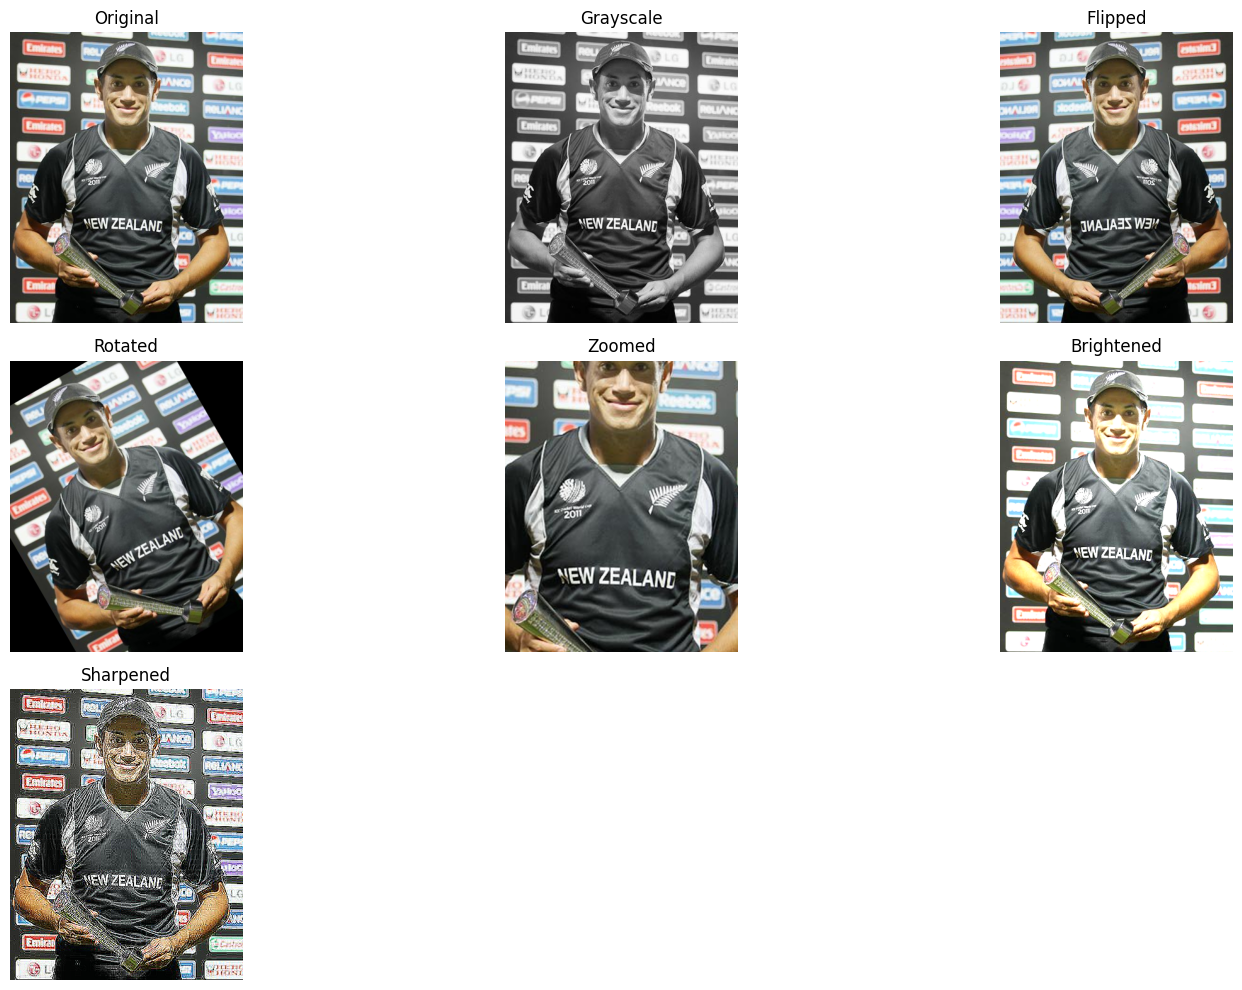

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size)

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def horizontal_flip(image):
    return cv2.flip(image, 1)

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def zoom_image(image, zoom_factor=1.5):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    new_width = int(width * zoom_factor)
    new_height = int(height * zoom_factor)
    resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    start_x = (resized.shape[1] - width) // 2
    start_y = (resized.shape[0] - height) // 2
    return resized[start_y:start_y + height, start_x:start_x + width]

def adjust_brightness(image, factor=1.5):
    return np.clip(image * factor, 0, 255).astype(np.uint8)

def sharpen_image(image):
    # Stronger sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])

    # Apply sharpening multiple times for a stronger effect
    sharpened_img = cv2.filter2D(image, -1, kernel)
    sharpened_img = cv2.filter2D(sharpened_img, -1, kernel)  # Sharpen again
    return sharpened_img

# Function to display original and augmented images
def show_augmented_samples(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Apply augmentations
    gray_img = convert_to_grayscale(image)
    flipped_img = horizontal_flip(image)
    rotated_img = rotate_image(image, angle=30)  # Rotate by 30 degrees
    zoomed_img = zoom_image(image)
    brightened_img = adjust_brightness(image)
    sharpened_img = sharpen_image(image)

    # Prepare images for display
    images_to_show = [
        ("Original", image),
        ("Grayscale", gray_img),
        ("Flipped", flipped_img),
        ("Rotated", rotated_img),
        ("Zoomed", zoomed_img),
        ("Brightened", brightened_img),
        ("Sharpened", sharpened_img)
    ]

    # Set up the plot
    plt.figure(figsize=(15, 10))

    for i, (title, img) in enumerate(images_to_show):
        plt.subplot(3, 3, i + 1)  # Create a grid of subplots
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title(title)
        plt.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "/content/drive/MyDrive/Facial_Detection_Dataset/Original_Dataset/0a8dbc1488.jpg"
show_augmented_samples(image_path)

# Creating Augmented Dataset

In [31]:
import os
import cv2
import numpy as np

# Define your augmentation functions
def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size)

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def horizontal_flip(image):
    return cv2.flip(image, 1)

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def zoom_image(image, zoom_factor=1.5):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    new_width = int(width * zoom_factor)
    new_height = int(height * zoom_factor)
    resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    start_x = (resized.shape[1] - width) // 2
    start_y = (resized.shape[0] - height) // 2
    return resized[start_y:start_y + height, start_x:start_x + width]

def adjust_brightness(image, factor=1.5):
    return np.clip(image * factor, 0, 255).astype(np.uint8)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Function to create augmented dataset
def create_augmented_dataset(original_dataset_path, augmented_dataset_path):
    # Create the augmented dataset directory if it doesn't exist
    os.makedirs(augmented_dataset_path, exist_ok=True)

    # Process each player's directory in the original dataset
    for player in os.listdir(original_dataset_path):
        player_path = os.path.join(original_dataset_path, player)

        if os.path.isdir(player_path):
            # Create a subdirectory for each player in the augmented dataset
            player_augmented_path = os.path.join(augmented_dataset_path, player)
            os.makedirs(player_augmented_path, exist_ok=True)

            # Initialize a counter for naming images
            img_counter = 1

            # Process each image in the player's directory
            for img_name in os.listdir(player_path):
                img_path = os.path.join(player_path, img_name)
                image = cv2.imread(img_path)

                if image is not None:
                    # Rename and save original image
                    original_img_name = f"{player}_{str(img_counter).zfill(3)}.jpeg"
                    cv2.imwrite(os.path.join(player_augmented_path, original_img_name), image)

                    # Apply augmentations and save them with new names
                    gray_img = convert_to_grayscale(image)
                    cv2.imwrite(os.path.join(player_augmented_path, f"{player}_{str(img_counter).zfill(3)}_gray.jpeg"), gray_img)

                    flipped_img = horizontal_flip(image)
                    cv2.imwrite(os.path.join(player_augmented_path, f"{player}_{str(img_counter).zfill(3)}_flipped.jpeg"), flipped_img)

                    rotated_img = rotate_image(image, angle=30)  # Rotate by 30 degrees
                    cv2.imwrite(os.path.join(player_augmented_path, f"{player}_{str(img_counter).zfill(3)}_rotated.jpeg"), rotated_img)

                    zoomed_img = zoom_image(image)                # Apply zoom on face
                    cv2.imwrite(os.path.join(player_augmented_path, f"{player}_{str(img_counter).zfill(3)}_zoomed.jpeg"), zoomed_img)

                    brightened_img = adjust_brightness(image)
                    cv2.imwrite(os.path.join(player_augmented_path, f"{player}_{str(img_counter).zfill(3)}_brightened.jpeg"), brightened_img)

                    sharpened_img = sharpen_image(image)
                    cv2.imwrite(os.path.join(player_augmented_path, f"{player}_{str(img_counter).zfill(3)}_sharpened.jpeg"), sharpened_img)

                    # Increment the counter for the next image
                    img_counter += 1

    print("Augmented Dataset Successfully Prepared!!!")

# Example usage
original_dataset_path = "/content/drive/MyDrive/Internship_Dataset/Original_Dataset"
augmented_dataset_path = "/content/drive/MyDrive/Internship_Dataset/Augemted_Dataset"
create_augmented_dataset(original_dataset_path, augmented_dataset_path)

Augmented Dataset Successfully Prepared!!!


# Splitting Dataset

In [28]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Input and output paths
input_folder = '/content/drive/MyDrive/Internship_Dataset/Augemted_Dataset'  # Path to the original dataset
output_folder = '/content/drive/MyDrive/Internship_Dataset/Splitted_Dataset'    # Path to the split dataset

os.makedirs(output_folder, exist_ok=True)

# Create train, validation, and test folders
os.makedirs(f"{output_folder}/train", exist_ok=True)
os.makedirs(f"{output_folder}/validation", exist_ok=True)
os.makedirs(f"{output_folder}/test", exist_ok=True)

# Get all class folders
class_folders = [folder for folder in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, folder))]

# Split each class into train, validation, and test sets
for class_name in class_folders:
    class_path = os.path.join(input_folder, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]  # Filter image files

    # Split data: 60% train, 20% validation, 20% test
    train, test = train_test_split(images, test_size=0.2, random_state=42)
    train, val = train_test_split(train, test_size=0.25, random_state=42)  # 60/20/20 split

    # Create class subdirectories in output folders
    os.makedirs(f"{output_folder}/train/{class_name}", exist_ok=True)
    os.makedirs(f"{output_folder}/validation/{class_name}", exist_ok=True)
    os.makedirs(f"{output_folder}/test/{class_name}", exist_ok=True)

    # Move images to their respective folders
    for img in train:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/train/{class_name}/{img}")
    for img in val:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/validation/{class_name}/{img}")
    for img in test:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/test/{class_name}/{img}")

print("Dataset successfully split into train, validation, and test sets!")

Dataset successfully split into train, validation, and test sets!


In [30]:
import os

# Function to count images in a folder
def count_images(folder_path):
    counts = {class_name: len(os.listdir(os.path.join(folder_path, class_name))) for class_name in os.listdir(folder_path)}
    return counts

output_folder = '/content/drive/MyDrive/Internship_Dataset/Splitted_Dataset'

print("Train distribution:", count_images(f"{output_folder}/train"))
print("Validation distribution:", count_images(f"{output_folder}/validation"))
print("Test distribution:", count_images(f"{output_folder}/test"))

Train distribution: {'ms_dhoni': 58, 'mujeeb_ur_rahman': 58, 'mushfiqur_rahim': 33, 'rashid_khan': 63, 'ravindra_jadeja': 71, 'rohit_sharma': 45, 'ross_taylor': 71, 'samiullah_shinwari': 42, 'sarfaraz_ahmed': 50, 'steve_smith': 50}
Validation distribution: {'ms_dhoni': 20, 'mujeeb_ur_rahman': 20, 'mushfiqur_rahim': 11, 'rashid_khan': 21, 'ravindra_jadeja': 24, 'rohit_sharma': 16, 'ross_taylor': 24, 'samiullah_shinwari': 14, 'sarfaraz_ahmed': 17, 'steve_smith': 17}
Test distribution: {'ms_dhoni': 20, 'mujeeb_ur_rahman': 20, 'mushfiqur_rahim': 12, 'rashid_khan': 21, 'ravindra_jadeja': 24, 'rohit_sharma': 16, 'ross_taylor': 24, 'samiullah_shinwari': 14, 'sarfaraz_ahmed': 17, 'steve_smith': 17}
